In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12)

In [3]:
data_path = Path('/home/gautham/kaggle/casava leaf')

## Explore data

In [4]:
list(data_path.glob('*'))

[PosixPath('/home/gautham/kaggle/casava leaf/label_num_to_disease_map.json'),
 PosixPath('/home/gautham/kaggle/casava leaf/cassava-leaf-disease-classification'),
 PosixPath('/home/gautham/kaggle/casava leaf/train.csv'),
 PosixPath('/home/gautham/kaggle/casava leaf/sample_submission.csv'),
 PosixPath('/home/gautham/kaggle/casava leaf/cassava-leaf-disease-classification.zip'),
 PosixPath('/home/gautham/kaggle/casava leaf/train_images'),
 PosixPath('/home/gautham/kaggle/casava leaf/test_images')]

In [5]:
train = pd.read_csv(data_path/'train.csv')
label_map = pd.read_json(data_path/'label_num_to_disease_map.json', typ='series')

In [6]:
train.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [7]:
train['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [8]:
label_map

0         Cassava Bacterial Blight (CBB)
1    Cassava Brown Streak Disease (CBSD)
2             Cassava Green Mottle (CGM)
3           Cassava Mosaic Disease (CMD)
4                                Healthy
dtype: object

## Read Images

In [17]:
from wrapml.image.utils import read_image, show_image_grid

train_imgs = data_path/'train_images/'

In [11]:
read_image(train_imgs/'1000015157.jpg')

### Each label plots

In [48]:
def show_grid(label, shuffle=True):
    print(label, label_map[label])
    df = train.loc[train['label'] == label]
    if shuffle:
        df = df.sample(4)
    else:
        df = df.head(4)
    display(df)
    show_image_grid([train_imgs/img for img in df['image_id']], n_cols=2)

In [49]:
show_grid(0)

0 Cassava Bacterial Blight (CBB)


image_id  label
14591  3614778275.jpg      0
14525  3602702041.jpg      0
20438   812733394.jpg      0
17157  4088770277.jpg      0

Brown dry dots on the leaf is Bacterial blight

1 Cassava Brown Streak Disease (CBSD)


image_id  label
5977   2066754199.jpg      1
1492   1264109301.jpg      1
398    1072259548.jpg      1
11878  3123083708.jpg      1

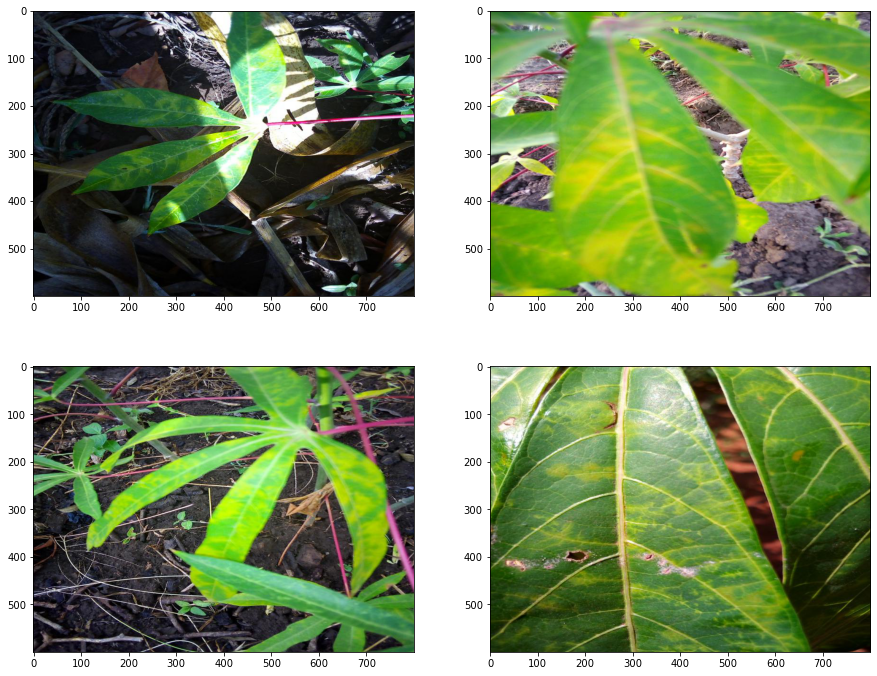

In [54]:
show_grid(1)

Yellow patches all over the leaf is Brown streak disease

In [64]:
show_grid(2)

2 Cassava Green Mottle (CGM)


image_id  label
1420   1250364598.jpg      2
8694   2542075685.jpg      2
3716   1657954384.jpg      2
12985  3324881806.jpg      2

Lots of green/yellow dots on the leaf is green mottle

3 Cassava Mosaic Disease (CMD)


image_id  label
2188   1379081390.jpg      3
2851    149376158.jpg      3
1796    131507385.jpg      3
16076  3894262995.jpg      3

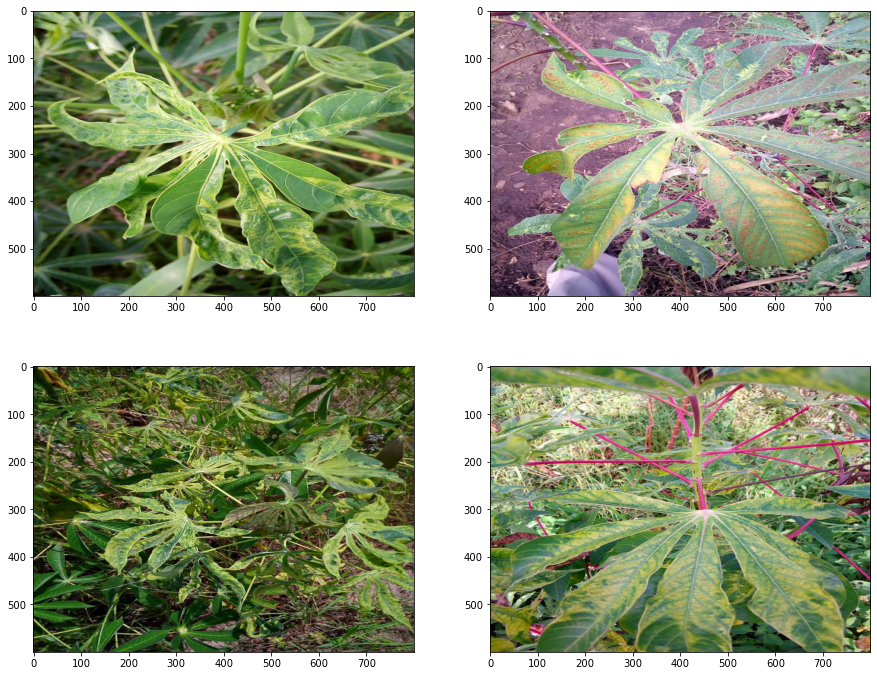

In [67]:
show_grid(3)

shrinked or deformed lead is Mosaic disease

4 Healthy


image_id  label
15389  3767372651.jpg      4
2876   1497799028.jpg      4
4795   1855389006.jpg      4
4584   1820335596.jpg      4

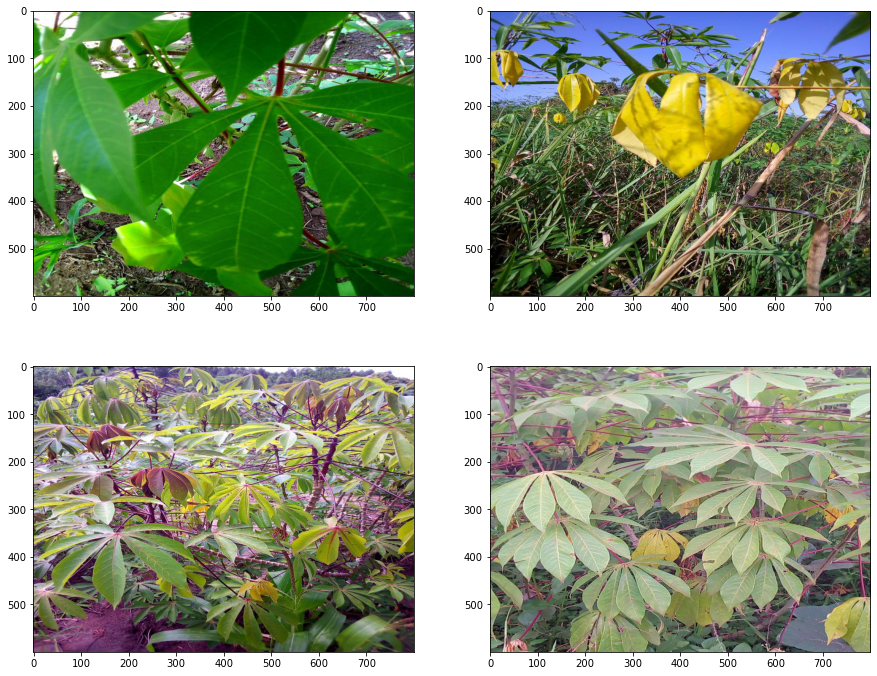

In [74]:
show_grid(4)

- Full yellow leafs are also healthy
- There is a large number of images in healthy that also appear to be diseased

## Expore albumentations

In [99]:
import albumentations as A

In [85]:
img = np.array(read_image(train_imgs/'1000015157.jpg'))

In [89]:
img.shape

(600, 800, 3)

In [87]:
t = A.Transpose(p=1)

In [94]:
a_image = t(**{'image': img})

In [101]:
plt.imshow(a_image['image'])